<a href="https://colab.research.google.com/github/sachinthadilshann/MLCourseUdemy/blob/main/Digit_Recognition_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [9]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

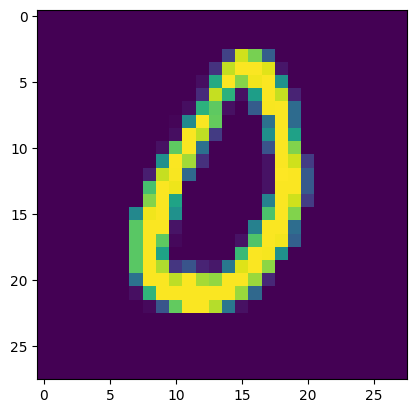

In [10]:
plt.imshow(x_train[666])

In [11]:
y_train[666]

0

In [12]:
 x_train.min(),x_train.max()

(0, 255)

In [13]:
y_train.min(),y_train.max()

(0, 9)

In [14]:
x_train = x_train/255.0
x_test = x_test/255.0

In [15]:
x_train.min(),x_train.max()

(0.0, 1.0)

In [16]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
#reshape the images
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28,1)

In [18]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
input_shape = x_train[0].shape
print(input_shape)

(28, 28, 1)


In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [23]:
history = model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 8s 6ms/step - loss: 0.1950 - sparse_categorical_accuracy: 0.9441 - val_loss: 0.0600 - val_sparse_categorical_accuracy: 0.9812
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0545 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0416 - val_sparse_categorical_accuracy: 0.9855
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0395 - sparse_categorical_accuracy: 0.9881 - val_loss: 0.0310 - val_sparse_categorical_accuracy: 0.9896
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.0301 - val_sparse_categorical_accuracy: 0.9903
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0241 - sparse_categorical_accuracy: 0.9924 - val_loss: 0.0329 - val_sparse_categorical_accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0182 - sparse_categorica

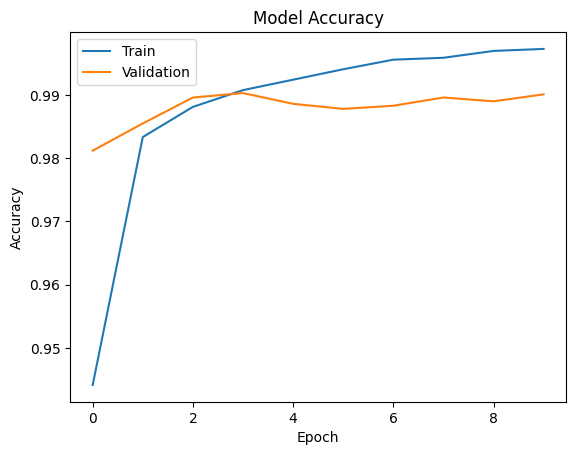

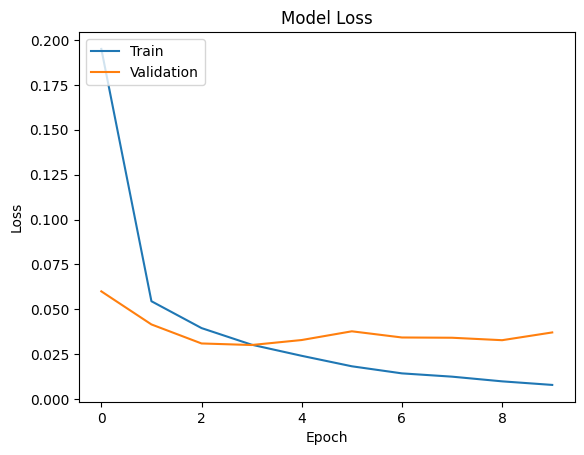

In [24]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 1s 2ms/step


In [26]:
print("Predicted:", y_pred[66])
print("True Label:", y_test[66])

Predicted: 6
True Label: 6


In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [28]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 977    0    0    0    0    0    0    1    2    0]
 [   0 1132    1    0    1    0    1    0    0    0]
 [   0    0 1024    0    2    0    0    3    3    0]
 [   1    0    1 1000    0    5    0    0    3    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   2    1    0    4    0  882    1    1    1    0]
 [   2    3    0    0    3    2  946    0    2    0]
 [   0    2    8    0    2    0    0 1012    2    2]
 [   3    0    1    0    1    0    0    0  968    1]
 [   0    3    1    0   15    5    0    3    3  979]]


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

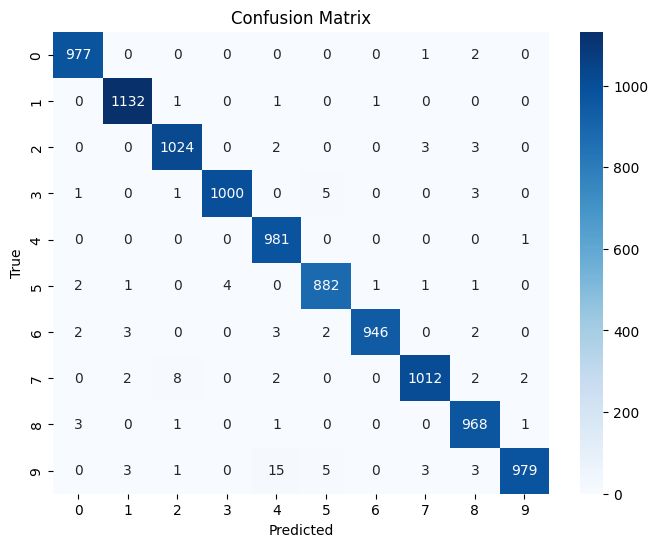

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
ac =accuracy_score(y_test, y_pred)
print('Accuracy Score is : ',ac*100, '%')

Accuracy Score is :  99.00999999999999 %
